In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,classification_report

C:\Users\mandl\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
a=pd.read_csv('neo.csv')

In [3]:
a

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [4]:
a.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [5]:
a.info

<bound method DataFrame.info of              id                 name  est_diameter_min  est_diameter_max  \
0       2162635  162635 (2000 SS164)          1.198271          2.679415   
1       2277475    277475 (2005 WK4)          0.265800          0.594347   
2       2512244   512244 (2015 YE18)          0.722030          1.614507   
3       3596030          (2012 BV13)          0.096506          0.215794   
4       3667127          (2014 GE35)          0.255009          0.570217   
...         ...                  ...               ...               ...   
90831   3763337           (2016 VX1)          0.026580          0.059435   
90832   3837603           (2019 AD3)          0.016771          0.037501   
90833  54017201           (2020 JP3)          0.031956          0.071456   
90834  54115824           (2021 CN5)          0.007321          0.016370   
90835  54205447           (2021 TW7)          0.039862          0.089133   

       relative_velocity  miss_distance orbiting_body  

In [6]:
a.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [7]:
a.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [8]:
a.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
a.drop(['id','name'],axis=1,inplace=True)

In [10]:
a

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


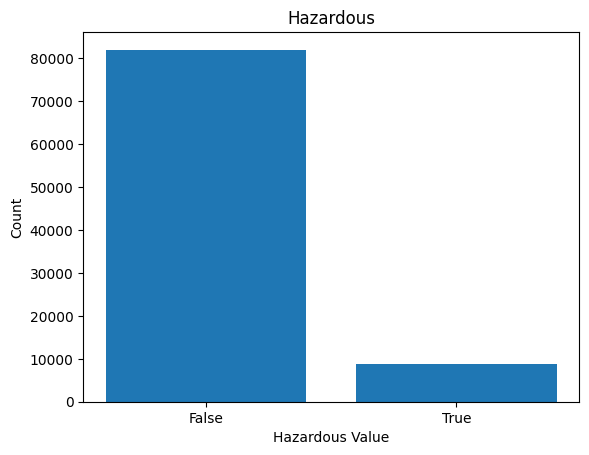

In [11]:
value_counts = a['hazardous'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.title('Hazardous')
plt.xlabel('Hazardous Value')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

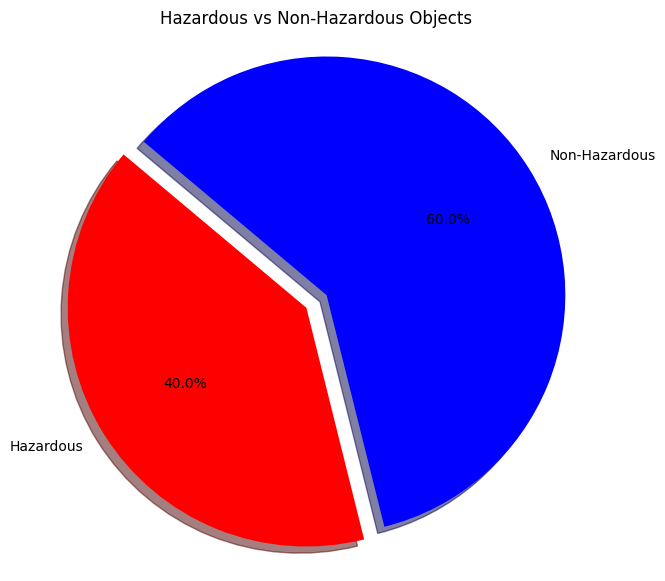

In [12]:
import matplotlib.pyplot as plt

# Data
labels = ['Hazardous', 'Non-Hazardous']
sizes = [2, 3]  # Counts of True and False in 'hazardous' column
colors = ['red', 'blue']
explode = (0.1, 0)  # explode the 1st slice (Hazardous)

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Hazardous vs Non-Hazardous Objects')

# Show plot
plt.show()


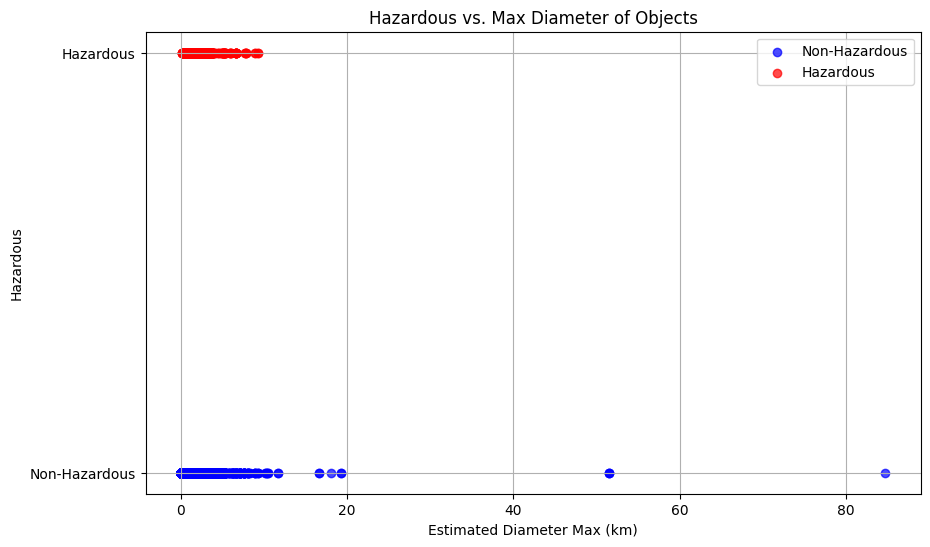

In [13]:
plt.figure(figsize=(10, 6))
hazardous = a[a['hazardous'] == True]
non_hazardous = a[a['hazardous'] == False]

plt.scatter(non_hazardous['est_diameter_max'], non_hazardous['hazardous'], color='blue', label='Non-Hazardous', alpha=0.7)
plt.scatter(hazardous['est_diameter_max'], hazardous['hazardous'], color='red', label='Hazardous', alpha=0.7)

plt.xlabel('Estimated Diameter Max (km)')
plt.ylabel('Hazardous')
plt.title('Hazardous vs. Max Diameter of Objects')
plt.yticks([0, 1], ['Non-Hazardous', 'Hazardous'])
plt.legend()
plt.grid(True)
plt.show()

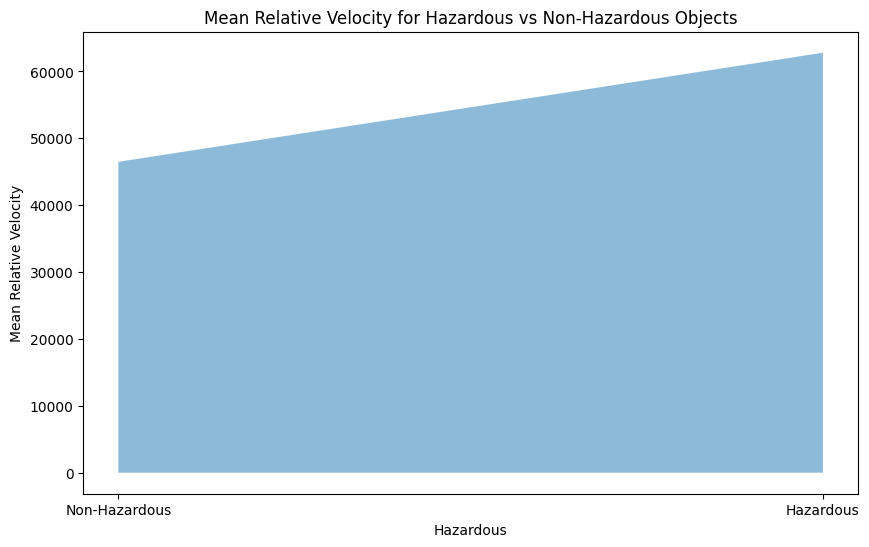

In [14]:
mean_relative_velocity = a.groupby('hazardous')['relative_velocity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.fill_between(mean_relative_velocity['hazardous'].astype(str), mean_relative_velocity['relative_velocity'], alpha=0.5)
plt.title('Mean Relative Velocity for Hazardous vs Non-Hazardous Objects')
plt.xlabel('Hazardous')
plt.ylabel('Mean Relative Velocity')
plt.xticks(ticks=[0, 1], labels=['Non-Hazardous', 'Hazardous'])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
le.fit(a['orbiting_body'])
a['orbiting_body']=le.transform(a['orbiting_body'])
a['orbiting_body']=a['orbiting_body'].astype(float)

In [18]:
le.fit(a['sentry_object'])
a['sentry_object']=le.transform(a['sentry_object'])
a['sentry_object']=a['sentry_object'].astype(float)

In [19]:
le.fit(a['hazardous'])
a['hazardous']=le.transform(a['hazardous'])
a['hazardous']=a['hazardous'].astype(float)

In [20]:
a.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body         float64
sentry_object         float64
absolute_magnitude    float64
hazardous             float64
dtype: object

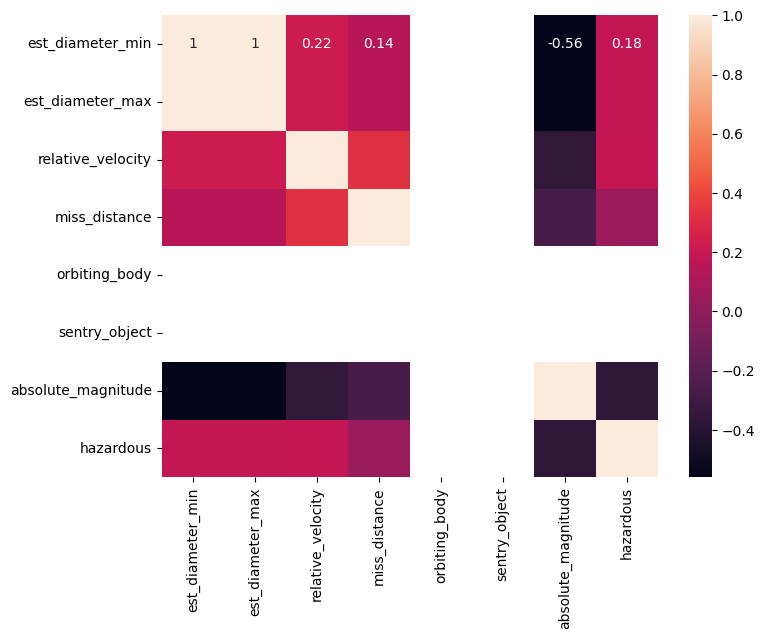

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(a.corr(), annot = True)
plt.show()

In [22]:
a.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.0,90836.0,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,0.0,0.0,23.527103,0.097318
std,0.298511,0.667491,25293.296961,2.235204e+07,0.0,0.0,2.894086,0.296392
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.019256,0.043057,28619.020645,1.721082e+07,0.0,0.0,21.340000,0.000000
50%,0.048368,0.108153,44190.117890,3.784658e+07,0.0,0.0,23.700000,0.000000
75%,0.143402,0.320656,62923.604633,5.654900e+07,0.0,0.0,25.700000,0.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


# Splitting Data

In [23]:
x=a.iloc[:,:-1]
y=a.iloc[:,-1]

In [24]:
x

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,0.0,0.0,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,0.0,0.0,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,0.0,0.0,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,0.0,0.0,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,0.0,0.0,20.09
...,...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,0.0,0.0,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,0.0,0.0,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,0.0,0.0,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,0.0,0.0,27.80


In [25]:
y

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
90831    0.0
90832    0.0
90833    0.0
90834    0.0
90835    0.0
Name: hazardous, Length: 90836, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# XG Boosting

In [28]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [29]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
ypredg=xgbr.predict(x_test)

In [31]:
score=xgbr.score(x_train,y_train)
print(score)

0.5043344430881642


# Ada Boosting

In [32]:
 from sklearn.ensemble import AdaBoostClassifier

In [33]:
adamodel = AdaBoostClassifier(n_estimators=100)

In [34]:
model=adamodel.fit(x_train,y_train)

In [35]:
ypreda=model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print("accuracy:",accuracy_score(y_test,ypreda))

accuracy: 0.9129238221047996


In [38]:
accuracy_score(y_test,ypreda)*100

91.29238221047996

In [39]:
print(classification_report(ypreda,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     17784
         1.0       0.16      0.73      0.26       384

    accuracy                           0.91     18168
   macro avg       0.58      0.82      0.61     18168
weighted avg       0.98      0.91      0.94     18168



# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
classifier = LogisticRegression()

In [42]:
parameters={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [43]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [44]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [45]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [46]:
y_predlo=classifier_regressor.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,classification_report

In [48]:
scorel=accuracy_score(y_predlo,y_test)
print(scorel*100)

90.15301629238222


In [49]:
print(classification_report(y_predlo,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     18077
         1.0       0.02      0.33      0.03        91

    accuracy                           0.90     18168
   macro avg       0.51      0.62      0.49     18168
weighted avg       0.99      0.90      0.94     18168



# Decision Tree

In [50]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)

In [52]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [53]:
ypredd=clf_entropy.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(ypredd,y_test)

In [55]:
accuracy_score*100

91.39696169088506

In [56]:
print(classification_report(ypredd,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     17917
         1.0       0.13      0.89      0.22       251

    accuracy                           0.91     18168
   macro avg       0.56      0.90      0.59     18168
weighted avg       0.99      0.91      0.94     18168



# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=42)


In [59]:
clf.fit(x_train,y_train)


RandomForestClassifier(n_jobs=2, random_state=42)

In [60]:
ypredrf=clf.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
scorer=accuracy_score(y_test,ypredrf)
scorer*100

92.11800968736239

In [63]:
print(classification_report(ypredrf,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     17000
         1.0       0.42      0.64      0.51      1168

    accuracy                           0.92     18168
   macro avg       0.70      0.79      0.73     18168
weighted avg       0.94      0.92      0.93     18168



# SVM

In [64]:
from sklearn import svm

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
clfs = svm.SVC(kernel='linear', gamma='auto', C=2)
clfs.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [68]:
y_preds=clf.predict(x_test)

In [69]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88     16410
         1.0       0.29      0.69      0.41      1758

    accuracy                           0.81     18168
   macro avg       0.63      0.76      0.65     18168
weighted avg       0.90      0.81      0.84     18168



In [70]:
scoresv=accuracy_score(y_preds,y_test)
print(scoresv*100)

80.50968736239543
